# Machine Learning and Statistics Assignment
***
## Paired samples t-test.


### Objectives of this notebook:
1. Show how scipy.stats can be used to perform a paired samples t-test.
2. Find an appropriate data set online or elsewhere on which to perform a paired samples t-test.
3. Demonstrate how to perform a t-test on the data set.

## Introduction
***
`scipy.stats` is the SciPy sub-package which is mainly used for probabilistic distributions and statistical operations. SciPy stands for Scientific Python it is a very powerful open-source library and it's being used to perform  mathematical, scientific and engineering computations. It is build upon `NumPy` library and was created by the same person who created NumPy - Travis Olliphant with help from the open source community. 

Scipy.stats "*contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more."* [1]

### T-test

<p><img src="https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg" alt="William Sealy Gosset.jpg" style="float: right;" height="600" width="250"><br></p>

"*A t-test is a type of statistical analysis used to compare the averages of two groups and determine if the differences between them are more likely to arise from random chance."* [2] 

It was developed by William Sealy Gosset in 1908 as Student’s t-test. He published his work under the pseudonym “Student”. The purpose of the test is to compare the means of one or two related or unrelated sample groups. A t-test may be used to evaluate whether
- a single group differs from a known value (a one-sample t-test), 
- two groups differ from each other (an independent two-sample t-test), 
- there is a significant difference in paired measurements (a paired, or dependent samples t-test). [3]

If more than two groups need to be compared, multiple comparison method needs to be used such as ANOVA.

**t-Test assumptions**

- Data values are independent and continuous.
- Data has been randomly sampled from a population.
- There is homogeneity of variance (i.e., the variability of the data in each group is similar). Samples have almost equal standard deviation (applicable for a two-sample t-test)
- Data distribution is approximately normal. [4]

**Performing t-test**
1. State a hypothesis. A hypothesis is classified as a null hypothesis ($H_0$) and an alternative hypothesis ($Ha$) that rejects the null hypothesis.
2. Collect sample data.
3. Conduct the test.
4. Reject or fail to reject your null hypothesis $H_0$.

### Paired Sample T-Test
<p><img src="https://i0.wp.com/thedatascientist.com/wp-content/uploads/2022/06/paired-t-test.png?ssl=1" alt="T-test.png"  height="800" width="650"><br></p>
<p style="text-align: center;">Img taken from thedatascientist.com</p><br>

As mentioned above for the purposes of this assessment we are going to focus on **Paired Sample T-Test**
The paired sample t-test is also called dependent sample t-test. It’s an univariate test that tests for a significant difference between two related variables. 
It is used to compare two population means where you have two samples in which observations in one sample can be pared with observations in the over sample. An example of this is before and after observations on the same subject: 

- student's diagnostic test results before and after particular course, 
- comparing the average price of a product before and after a price change to measure the effect of the change on sales,
- before-and-after treatment measurements for a group of people.

### Hypotheses

1. Null hypotheses $H_0$: the true mean difference is equal to zero (between the observations). Meaning that if we run this test on a large number of samples from the population we would expect most of them to have mean paired differences close to zero (most samples would have small positive or negative differences between their values).

2. Alternative hypotheses $Ha$: the true mean difference is not equal to zero (two-tailed). This means an effect is observed— something has changed from one sample set to another or one group to another. [5]

### T-statistics formula
Let's have a look at *t-statistics formula for Paired Sample T-Test*:


$$ t=  \frac{\bar d}{\frac{\bar s_d} {\sqrt{n}}} $$

T = (mean difference between pairs) / (standard deviation of differences / square root of sample size)

We can compute the p-value corresponding to the absolute value of the t-test statistics (|t|) for the degrees of freedom `(df): df=n−1`<br>
If the p-value is inferior or equal to 0.05, we can conclude that the difference between the two paired samples are significantly different.

### Paired T-test using Scipy.stats
Taken from [docs.scipy.org](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)

`scipy.stats.ttest_rel(a, b, axis=0, nan_policy='propagate', alternative='two-sided', *, keepdims=False)`

 *Parameters*<br>
    **a, b** : array_like<br>
       &emsp; The arrays must have the same shape.<br>
    **axis** : int or None, default: 0<br>
        &emsp; Axis along which to compute test. If None, compute over the whole arrays, `a`, and `b`.<br>
    **nan_policy** : {'propagate', 'raise', 'omit'}, optional<br>
       &emsp; Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):<br>
         &emsp;&emsp; - propagate: returns nan<br>
         &emsp;&emsp; - raise: throws an error<br>
         &emsp;&emsp; - omit: performs the calculations ignoring nan values<br>
    **alternative** : {'two-sided', 'less', 'greater'}, optional<br>
       &emsp; Defines the alternative hypothesis.
     The following options are available (default is 'two-sided'):<br>
       &emsp;&emsp; - two-sided: the means of the distributions underlying the samples are unequal.<br>
       &emsp;&emsp; - less: the mean of the distribution underlying the first sample
        is less than the mean of the distribution underlying the secondbsample.<br>
       &emsp;&emsp; - greater: the mean of the distribution underlying the first
        sample is greater than the mean of the distribution underlying the second sample.<br>
    **keepdims** : bool, default: False<br>
    &emsp;If this is set to True, the axes which are reduced are left in the result as dimensions with size one. With this option, the result will broadcast correctly against the input array.<br>
    *Returns*<br>
    **result: TtestResult**
    An object with the following attributes:<br>
        &emsp;&emsp; - statistic : float or array<br>
        &emsp;&emsp;    The t-statistic.<br>
        &emsp;&emsp; - pvalue : float or array<br>
        &emsp;&emsp;    The p-value associated with the given alternative.<br>
        &emsp;&emsp; - df : float or array<br>
        &emsp;&emsp;    The number of degrees of freedom used in calculation of the
            t-statistic; this is one less than the size of the sample
            (`a.shape[axis]`).<br>
 The object also has the following method:<br>
        `confidence_interval(confidence_level=0.95)`<br>
             &emsp;&emsp;Computes a confidence interval around the difference in
            population means for the given confidence level.
            The confidence interval is returned in a namedtuple with
            fields `low` and `high`.

### Examples
***
#### Example 1
Now let's have a look at some examples how to perform t-test. Our first dataset (taken from [here](https://github.com/Opensourcefordatascience/Data-sets/blob/master/blood_pressure.csv)) contains blood pressure readings before and after an intervention. These are variables “bp_before” and “bp_after”. 

To check how the data looks like we going to import pandas

In [1]:
# Data frames
import pandas as pd

# reading data from the file
df = pd.read_csv("data/blood_pressure.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


Above, we can see the structure of the dataframe. Our dataset contains 120 observations and five variables (columns). Furthermore, there are two different datatypes in the dataframe - int64 and object. 
Here is how the top five rows from our table look:

In [2]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


As we are primarely interested in data from colums “bp_before” and “bp_after” for our analysis, let's group the together and get some descriptive statistics using the describe() method.

In [3]:
df[['bp_before','bp_after']].describe()


,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


Looks like the treatment has been succesfull as mean for blood presure after the treatment is lower the before.

<AxesSubplot:>

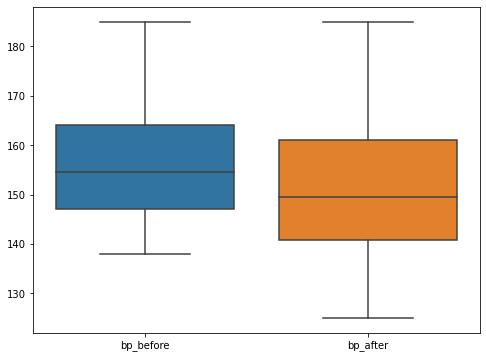

In [4]:
#importing packages for plotting
import seaborn as sns
import matplotlib.pyplot as plt
# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (8, 6)

# Creating boxplot to compare blood pressure before and after treatment
sns.boxplot(data=df[['bp_before','bp_after']])

From the above plot it appears that there are no significant outliers in the variables. Next, let's test that the data came from a normal distribution. We going to create two histograms

<AxesSubplot:ylabel='Count'>

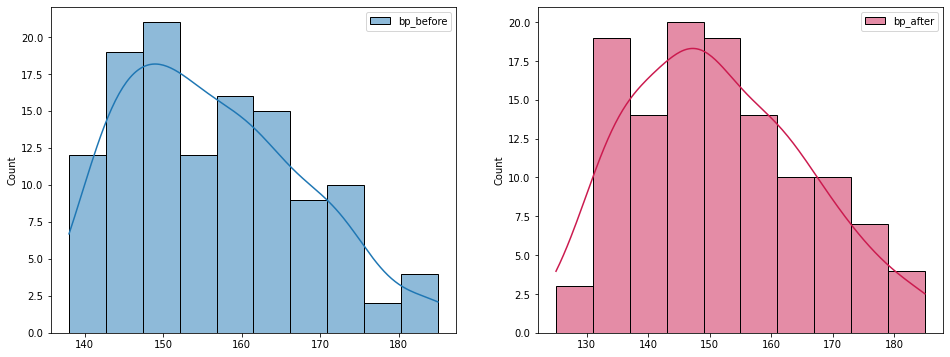

In [5]:
plt.rcParams["figure.figsize"] = (16,6)
fig, ax =plt.subplots(1,2)

sns.histplot(data=df[['bp_before']], bins=10, kde=True, ax=ax[0])
sns.histplot(data=df[['bp_after']], bins=10, palette="rocket", kde=True, ax=ax[1])


The histograms of our data does not seem to be normally distributed. There looks to be some skew to the right. We can try to test this statistically to see if the data is normally distributed. We can use the [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) for normality. 

The Shapiro-Wilk test is a statistical test used to check if a continuous variable follows a normal distribution. The null hypothesis (H0) states that the variable is normally distributed, and the alternative hypothesis (H1) states that the variable is NOT normally distributed. So after running this test: If p ≤ 0.05: then the null hypothesis can be rejected (i.e. the variable is NOT normally distributed). If p > 0.05: then the null hypothesis cannot be rejected (i.e. the variable MAY BE normally distributed). [7]

The below taken from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

`scipy.stats.shapiro(x)`<br>

**Parameters**<br>
    x: Array of sample data. <br>
    
**Returns**<br>
    statistic: The test statistic.<br>
    p-value: The p-value for the hypothesis test.


In [6]:
from scipy import stats
stats.shapiro(df['bp_before'])

ShapiroResult(statistic=0.9547787308692932, pvalue=0.0004928423441015184)

In [7]:
stats.shapiro(df['bp_after'])

ShapiroResult(statistic=0.9740639328956604, pvalue=0.020227791741490364)

Both of the variables violate the assumption of normality by a large amount. Therefore, one should use a different test to analyze this data. However, for demonstration purposes, we shall continue with using the paired sample t-test. Note, that the findings from this analysis should not be considered valid due to the large violation of the assumption about normality.

To conduct the paired sample t-test, one needs to use the `stats.ttest_rel()` method. Can be found: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [8]:
ttest_results = stats.ttest_rel(df['bp_before'], df['bp_after'])
ttest_results

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

The findings are statistically significant which means we can reject the null hypothesis in support of the alternative.

Another component needed to report the findings is the degrees of freedom (df). This can be calculated by taking the total number of paired observations and subtracting 1. In our case, df = 120 – 1 = 119.

#### Results

A paired sample t-test was used to analyze the blood pressure before and after the intervention to test if the intervention had a significant affect on the blood pressure. The blood pressure before the intervention was higher with mean of 156.45 and standard deviation 11.39 units compared to the blood pressure post intervention 151.36 ± 14.18 units. There was a statistically significant decrease in blood pressure (t(119)=3.34, p= 0.0011) of 5.09 units.

Note: As one of the assumptions(normality) for t-test is violated, results should not be trusted. Data should be analyzed using Wilcoxon signed-rank Test. [6]

#### Example 2
Let's take another example and see how student's score changed after online tutorial. We will use `students` data set for this. First we import it to pandas dataframe by using `read_csv` method and then have a look at it

In [9]:
import pandas as pd
import numpy as np

# taken from https://userpage.fu-berlin.de/soga/data/raw-data/students.csv
students = pd.read_csv("data/students.csv")
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8239 entries, 1 to 8239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   stud.id          8239 non-null   int64  
 1   name             8239 non-null   object 
 2   gender           8239 non-null   object 
 3   age              8239 non-null   int64  
 4   height           8239 non-null   int64  
 5   weight           8239 non-null   float64
 6   religion         8239 non-null   object 
 7   nc.score         8239 non-null   float64
 8   semester         8239 non-null   object 
 9   major            8239 non-null   object 
 10  minor            8239 non-null   object 
 11  score1           4892 non-null   float64
 12  score2           4892 non-null   float64
 13  online.tutorial  8239 non-null   int64  
 14  graduated        8239 non-null   int64  
 15  salary           1753 non-null   float64
dtypes: float64(5), int64(5), object(6)
memory usage: 1.1+ MB


We can see that it consists of 8239 rows, each representing a particular student, and 16 columns corresponding to a variable/feature related to that particular student

In [10]:
students.head()

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN


In this example we’re are interested in three variables from our dataset: score1, score2, and online.tutorial.

We want to know if there is there any difference between the students’ grades before and after taking an online learning tutorial? And if this tutorial actually helps the students to improve their exam’s grades?

In [11]:
students[['online.tutorial','score1', 'score2']].describe()

,online.tutorial,score1,score2
count,8239.000000,4892.000000,4892.000000
mean,0.386212,68.164963,69.494685
std,0.486910,14.051762,14.395251
min,0.000000,30.000000,31.000000
25%,0.000000,58.000000,59.000000
50%,0.000000,70.000000,71.000000
75%,1.000000,78.000000,80.000000
max,1.000000,97.000000,98.000000


From the first glance at the data we can determine that
 - `score1` and `score2` are the grades for two exams on mathematics and statistics (min score1 was 30, and max score2 was 98). We presume that the first exam takes place before the students attended the online statistics learning tutorial. However not all the students attendet the tutorial as it sin't mandatory.
 - variable `online.tutorial` is a binary. It is equal to 1 if the student completed the online statistics learning tutorial, or 0 otherwise.
 
**Data Preparation**

Let's beging with checking if grades of the students who took the online tutorial has improved.
To do that we need to take a subset of our dataset based on the variable `online.tutorial`. As we are interested in students who attended the tutorial, it should be equal to 1. Next, we take a random sample of 100 students from the dataset and extract the two variables of interest, score1 and score2. We will store the sample as dataframe object called sample.

In [12]:
n = 100

# getting subset where online.tutorial=1
subset = students.loc[students["online.tutorial"] == 1]

# using sample() method to get a random sample of items from an axis of objectthe subset above. 
# random_state - seed for random number generator.
sample = subset.sample(n, random_state = 7)[["score1", "score2"]]

sample.describe()

,score1,score2
count,100.000000,100.000000
mean,68.920000,71.660000
std,12.951097,13.185713
min,38.000000,36.000000
25%,61.000000,64.000000
50%,70.000000,74.000000
75%,78.250000,81.250000
max,91.000000,95.000000


Now, that we have our sample of students who took online tutorial, we going to compute the paired defferences between score1 and score2 and plot them, using the barplot.

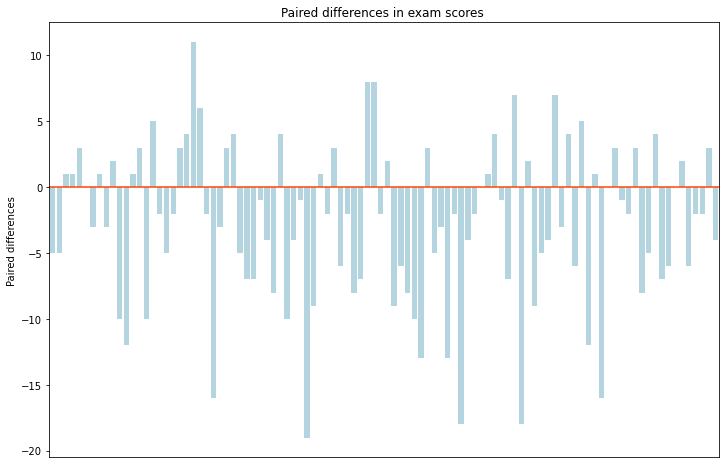

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting size of the plot
plt.figure(figsize=(12,8))

# Calculating paired differnces
d = sample["score1"] - sample["score2"]

# Constructing DataFrame from a dictionary
data = pd.DataFrame({'index' : np.arange(1, 101),
                     'Paired differences'  : d},
                    columns = ['index', 'Paired differences'])
# Plotting
sns.barplot(data = data, x = "index", y = "Paired differences", color = "lightblue")
plt.axhline(y = 0, color = "orangered")

# Getting current Axes
ax = plt.gca()
ax.set_title("Paired differences in exam scores ")
# Setting x-axis to not visible
ax.get_xaxis().set_visible(False)

From the plot above we can see as we expected, some students performed better on the first test and some on the second. It looks like the diffrerences have mostly negative values, which would indicate that most students had a higher grades on the second test (diffrences in our case is d = score1 - score2).

Next, we want to check the normality assumption. There are few ways to do so, but this time we going to use a visual inspection and create a [Q-Q plot](https://en.wikipedia.org/wiki/Q–Q_plot). If the data is normally distributed the graph should be roughly linear. We can use [scipy.stats.probplot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) for this:

<Figure size 1008x576 with 0 Axes>

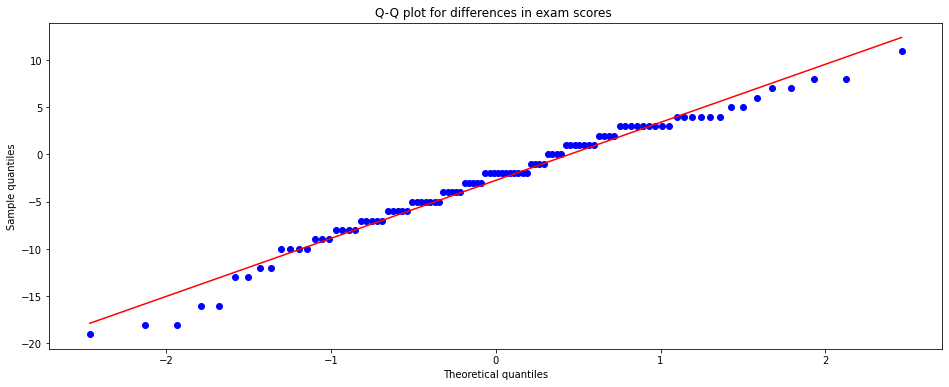

In [14]:
import scipy.stats as ss
# Setting size of the plot
plt.figure(figsize=(14,8))
fig, ax = plt.subplots()

# Calculating quantiles for a probability plot
qq = ss.probplot(d, dist="norm", plot = plt)
ax.set_title("Q-Q plot for differences in exam scores ")
ax.set_ylabel("Sample quantiles")
plt.show()

We can see that not all the data lays on the line and there is definitly some noise, especially in the lower and upper part. Let's see how the data distribution looks like for score1 and score2, using PDF, CDF and Q-Q plot

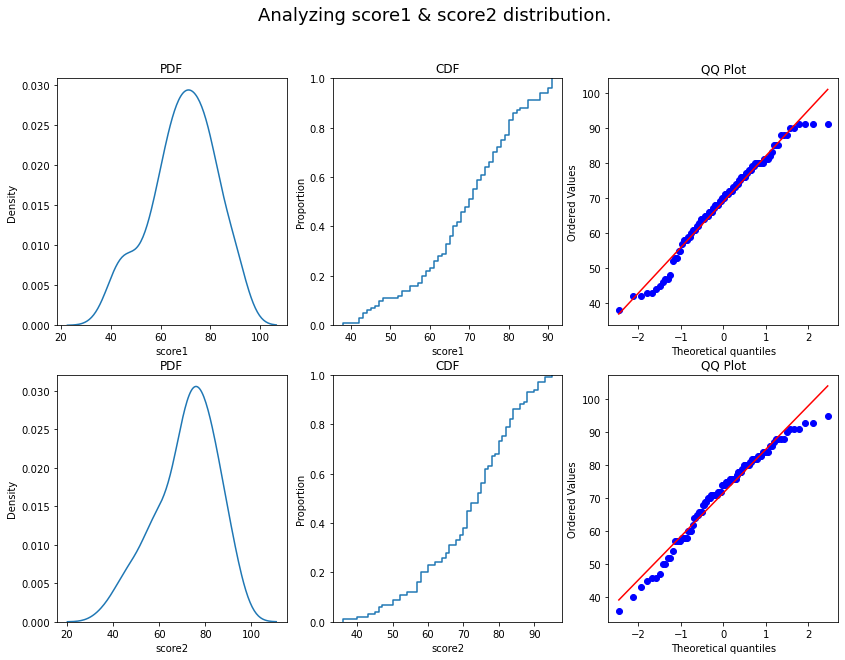

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Creating 2x3 grid to display our plots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))
fig.suptitle('Analyzing score1 & score2 distribution.', fontsize=18)
# Score1 PDF
sns.kdeplot(ax=axs[0, 0], x='score1', data=sample)
axs[0, 0].title.set_text('PDF')
# Score1 CDF
sns.ecdfplot(ax=axs[0, 1], x='score1', data=sample)
axs[0, 1].title.set_text('CDF')
# Score1 QQ Plot
qq_plot = stats.probplot( x=sample['score1'], plot=axs[0, 2])
axs[0, 2].title.set_text('QQ Plot')

# Score2 PDF
sns.kdeplot(x='score2', data=sample, ax=axs[1, 0])
axs[1, 0].title.set_text('PDF')
# Score2 CDF
sns.ecdfplot(x='score2', data=sample, ax=axs[1, 1])
axs[1, 1].title.set_text('CDF')
# Score2 QQ Plot
qq_plot = stats.probplot(x=sample['score2'], plot=axs[1, 2])
axs[1, 2].title.set_text('QQ Plot')

From the plots above we can observe the following:
1. Both PDFs seem to be left-skewed, with even more outliners for score1. 
2. CDF indicates that students performed slightly better on the second test.
3. QQ plots confirm that there are some outliners on both score1 & score2. There is a  deviation both at the top and bottom end. 

Even though the data doesn't appear to be Gaussian shape, again for the demostration purposes we can consider it to be roughly normally distributed.

We can calculate the mean of the paired differences $\bar{d}$ by:
\begin{equation*}
\bar{d} = \frac{\sum d} {n}
\end{equation*}

In [16]:
# In python we can claculate the mean using numpy.mean() method
diff_mean = np.mean(d)
diff_mean

-2.74

The standard deviation of the differences can then be determined using:
\begin{equation*}
s_d = \sqrt{\frac{\sum d^2- \frac{\left(\sum d\right)^2} {n}} {n-1}}
\end{equation*}

In [17]:
# Same formula using numpy
diff_std = np.sqrt((np.sum(d**2) - ((np.sum(d)**2) / n)) / (n - 1))
diff_std

6.114430687011066

## References

1. https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats <br>
2. https://en.wikipedia.org/wiki/Student%27s_t-test  <br>
3. https://www.jmp.com/en_nl/statistics-knowledge-portal/t-test.html <br>
4. https://thedatascientist.com/how-to-do-a-t-test-in-python/ <br>
5. https://www.questionpro.com/blog/paired-samples/
6. https://pythonfordatascienceorg.wordpress.com/paired-samples-t-test-python/
7. https://www.kaggle.com/code/eisgandar/t-tests-in-python-clearly-explained

## End